In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

import pickle

plt.rcParams['figure.figsize']= (15, 8)

In [2]:
data_dir = 'data'
model_dir = 'model'
base_name = 'airTemperature'

In [84]:
df = pd.read_csv("../data/Air Temperature.csv", skiprows=3, skipfooter=3, engine='python')
df

,Unnamed: 0,result,table,_start,_stop,_time,_value,_field,_measurement
0,NaN,NaN,0,2024-10-31T13:16:23.595934528Z,2024-11-07T13:16:23.595934528Z,2024-11-01T10:21:00Z,26.550000,airTemperature,first
1,NaN,NaN,0,2024-10-31T13:16:23.595934528Z,2024-11-07T13:16:23.595934528Z,2024-11-01T10:22:00Z,26.600000,airTemperature,first
2,NaN,NaN,0,2024-10-31T13:16:23.595934528Z,2024-11-07T13:16:23.595934528Z,2024-11-01T10:23:00Z,26.600000,airTemperature,first
3,NaN,NaN,0,2024-10-31T13:16:23.595934528Z,2024-11-07T13:16:23.595934528Z,2024-11-01T10:24:00Z,26.651429,airTemperature,first
4,NaN,NaN,0,2024-10-31T13:16:23.595934528Z,2024-11-07T13:16:23.595934528Z,2024-11-01T10:25:00Z,26.700000,airTemperature,first
...,...,...,...,...,...,...,...,...,...
6845,NaN,NaN,0,2024-10-31T13:16:23.595934528Z,2024-11-07T13:16:23.595934528Z,2024-11-07T13:11:00Z,26.142857,airTemperature,first
6846,NaN,NaN,0,2024-10-31T13:16:23.595934528Z,2024-11-07T13:16:23.595934528Z,2024-11-07T13:12:00Z,26.136111,airTemperature,first
6847,NaN,NaN,0,2024-10-31T13:16:23.595934528Z,2024-11-07T13:16:23.595934528Z,2024-11-07T13:13:00Z,26.111429,airTemperature,first
6848,NaN,NaN,0,2024-10-31T13:16:23.595934528Z,2024-11-07T13:16:23.595934528Z,2024-11-07T13:14:00Z,26.100000,airTemperature,first


In [85]:
features_selected = ['_time', '_value']

df = df[features_selected]
df

,_time,_value
0,2024-11-01T10:21:00Z,26.550000
1,2024-11-01T10:22:00Z,26.600000
2,2024-11-01T10:23:00Z,26.600000
3,2024-11-01T10:24:00Z,26.651429
4,2024-11-01T10:25:00Z,26.700000
...,...,...
6845,2024-11-07T13:11:00Z,26.142857
6846,2024-11-07T13:12:00Z,26.136111
6847,2024-11-07T13:13:00Z,26.111429
6848,2024-11-07T13:14:00Z,26.100000


In [86]:
df = df.rename(columns={'_time': 'datetime', '_value': f'{base_name}'})

In [87]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [88]:
df = df.set_index('datetime').asfreq('1min')
df

,airTemperature
datetime,
2024-11-01 10:21:00+00:00,26.550000
2024-11-01 10:22:00+00:00,26.600000
2024-11-01 10:23:00+00:00,26.600000
2024-11-01 10:24:00+00:00,26.651429
2024-11-01 10:25:00+00:00,26.700000
...,...
2024-11-07 13:11:00+00:00,26.142857
2024-11-07 13:12:00+00:00,26.136111
2024-11-07 13:13:00+00:00,26.111429


In [89]:
df = df.round({f'{base_name}': 2})
df

,airTemperature
datetime,
2024-11-01 10:21:00+00:00,26.55
2024-11-01 10:22:00+00:00,26.60
2024-11-01 10:23:00+00:00,26.60
2024-11-01 10:24:00+00:00,26.65
2024-11-01 10:25:00+00:00,26.70
...,...
2024-11-07 13:11:00+00:00,26.14
2024-11-07 13:12:00+00:00,26.14
2024-11-07 13:13:00+00:00,26.11


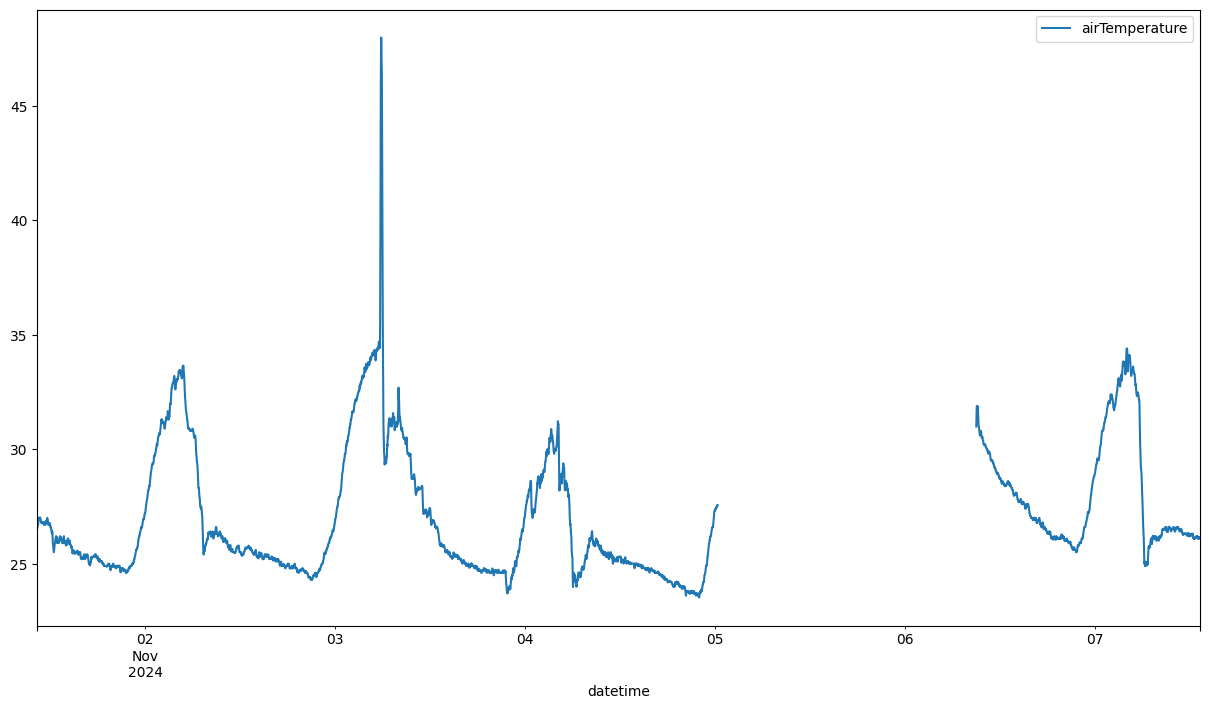

In [90]:
fig, ax = plt.subplots()
df.plot(ax=ax)
plt.xticks(rotation=15)
plt.show()

In [91]:
df.describe()

,airTemperature
count,6850.000000
mean,27.103743
std,2.803524
min,23.520000
25%,25.080000
50%,26.100000
75%,28.507500
max,47.980000


In [92]:
df.isna().sum()

airTemperature    1965
dtype: int64

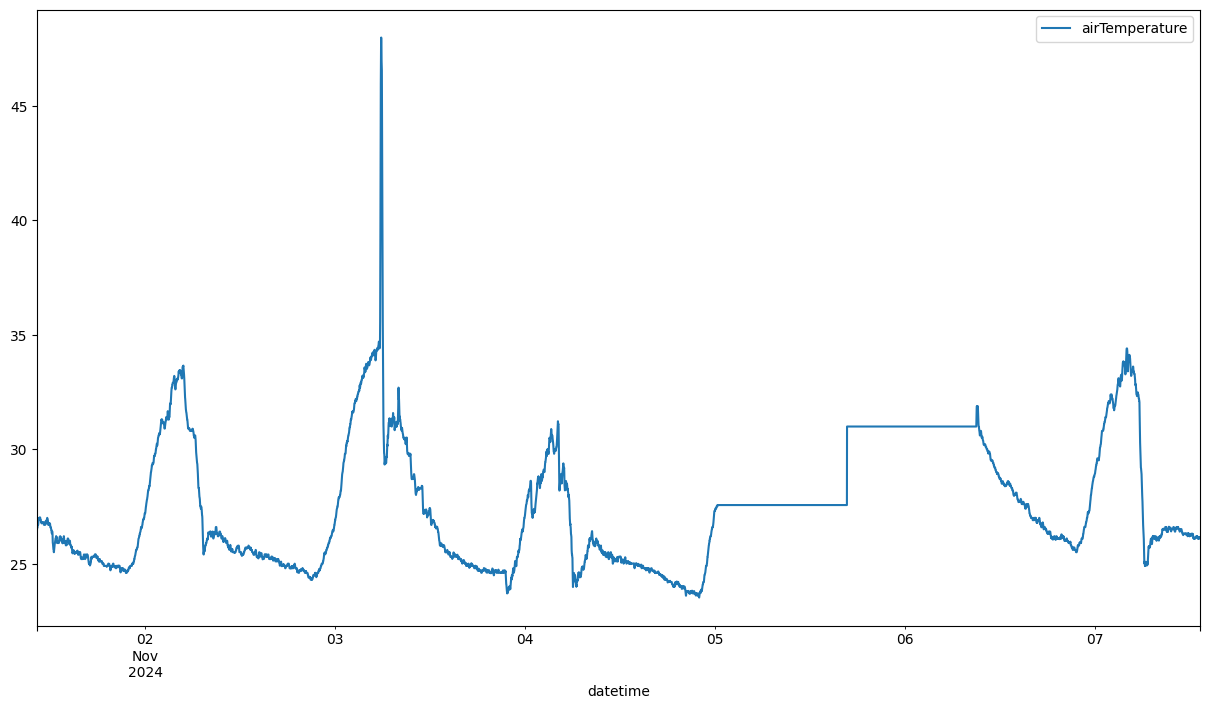

In [94]:
df_interpolate = df.interpolate(method='nearest')
fig, ax = plt.subplots()
df_interpolate.plot(ax=ax)
plt.xticks(rotation=15)
plt.show()

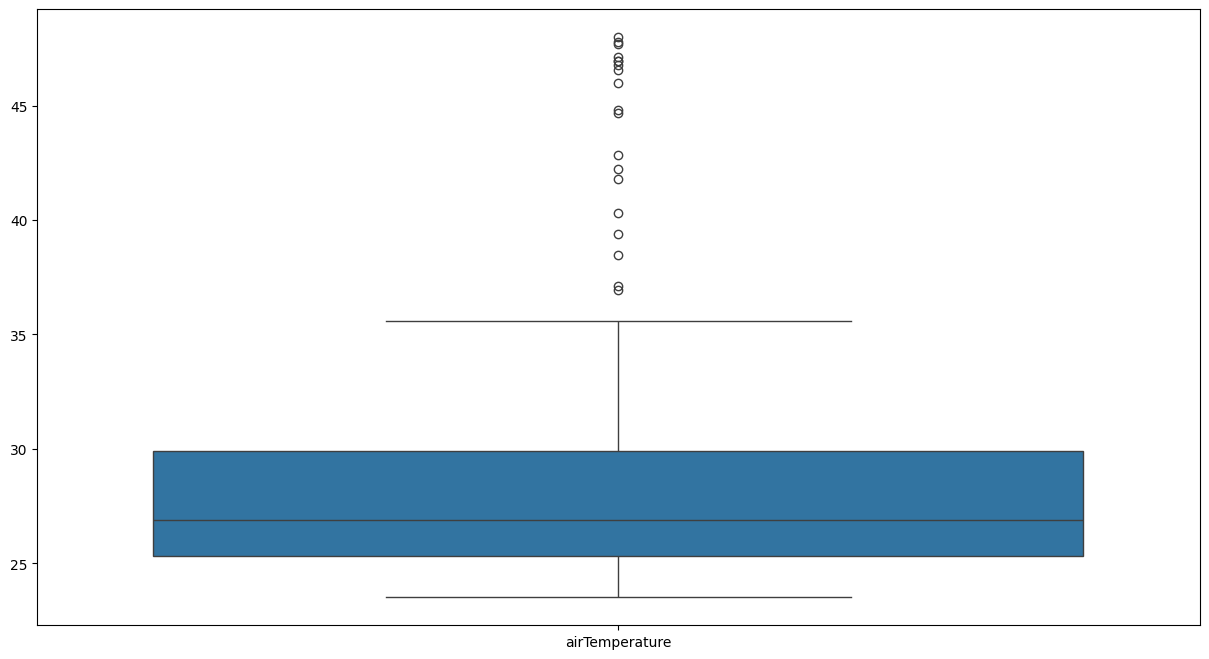

In [95]:
sns.boxplot(data=df_interpolate)

plt.show()

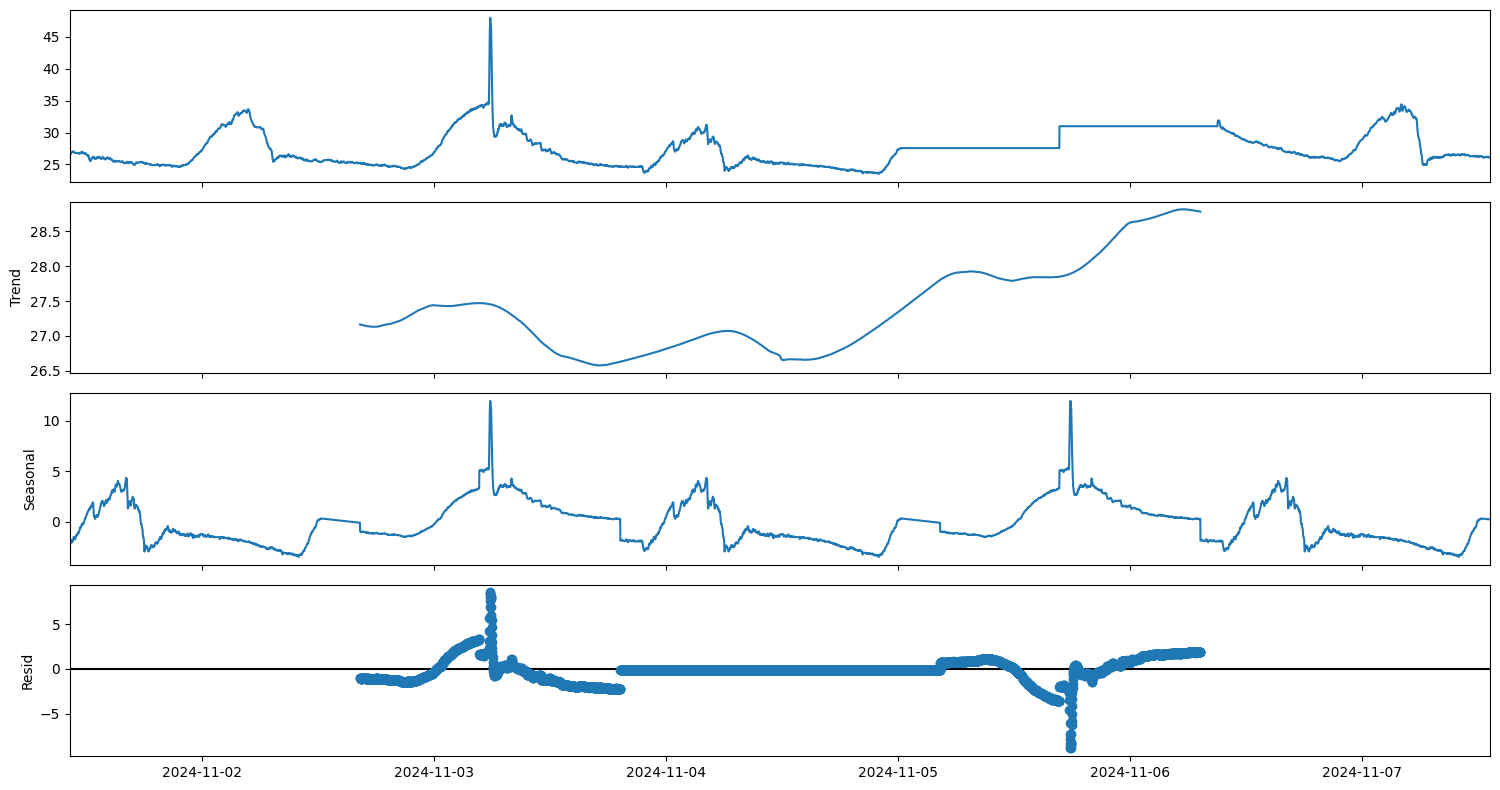

In [98]:
decomposition = seasonal_decompose(x=df_interpolate, period=60 * 60)

fig = decomposition.plot()

plt.show()